In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_connectivity = "all"

seed = 17

## Data Exploration

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
# Convert categorical variables into numerically encoded values
df.Street = df.Street.astype('category').cat.codes
df.Neighborhood = df.Neighborhood.astype('category').cat.codes
df.LotShape = df.LotShape.astype('category').cat.codes
df.LandContour = df.LandContour.astype('category').cat.codes
df.LotConfig = df.LotConfig.astype('category').cat.codes
df.LandSlope = df.LandSlope.astype('category').cat.codes
df.Condition1 = df.Condition1.astype('category').cat.codes
df.BldgType = df.BldgType.astype('category').cat.codes
df.HouseStyle = df.HouseStyle.astype('category').cat.codes
df.RoofStyle = df.RoofStyle.astype('category').cat.codes
df.RoofMatl = df.RoofMatl.astype('category').cat.codes
df.Exterior1st = df.Exterior1st.astype('category').cat.codes
df.MasVnrType = df.MasVnrType.astype('category').cat.codes
df.ExterQual = df.ExterQual.astype('category').cat.codes
df.ExterCond = df.ExterCond.astype('category').cat.codes
df.Foundation = df.Foundation.astype('category').cat.codes
df.BsmtQual = df.BsmtQual.astype('category').cat.codes
df.BsmtExposure = df.BsmtExposure.astype('category').cat.codes
df.BsmtFinType1 = df.BsmtFinType1.astype('category').cat.codes
df.HeatingQC = df.HeatingQC.astype('category').cat.codes
df.CentralAir = df.CentralAir.astype('category').cat.codes
df.Electrical = df.Electrical.astype('category').cat.codes
df.KitchenQual = df.KitchenQual.astype('category').cat.codes
df.Functional = df.Functional.astype('category').cat.codes
df.GarageType = df.GarageType.astype('category').cat.codes
df.FireplaceQu = df.FireplaceQu.astype('category').cat.codes

df.MasVnrArea = df.MasVnrArea.fillna(-1)
df.GarageYrBlt = df.GarageYrBlt.fillna(-1)
df.LotFrontage = df.LotFrontage.fillna(-1)

# df.drop(['Utilities'], axis=1) # drop fields with little to no variance

In [128]:
df[['Street', 'Neighborhood', 
   'LotShape', 'LandContour', 
   'LotConfig', 'LandSlope', 
   'Condition1', 'BldgType', 
   'HouseStyle', 'RoofStyle',
   'RoofMatl', 'Exterior1st',
   'MasVnrType', 'ExterQual',
   'ExterCond', 'Foundation',
   'BsmtQual', 'BsmtExposure',
   'BsmtFinType1', 'HeatingQC',
   'CentralAir', 'Electrical',
   'KitchenQual', 'Functional',
   'GarageType', 'FireplaceQu',
  ]]

,Street,Neighborhood,LotShape,LandContour,LotConfig,LandSlope,Condition1,BldgType,HouseStyle,RoofStyle,...,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,FireplaceQu
0,1,5,3,3,4,0,2,0,5,1,...,2,3,2,0,1,4,2,6,1,-1
1,1,24,3,3,2,0,1,0,2,1,...,2,1,0,0,1,4,3,6,1,4
2,1,5,0,3,4,0,2,0,5,1,...,2,2,2,0,1,4,2,6,1,4
3,1,6,0,3,0,0,2,0,5,1,...,3,3,0,2,1,4,2,6,5,2
4,1,15,0,3,2,0,2,0,5,1,...,2,0,2,0,1,4,2,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,8,3,3,4,0,2,0,5,1,...,2,3,5,0,1,4,3,6,1,4
1456,1,14,3,3,4,0,2,0,2,1,...,2,3,0,4,1,4,3,2,1,4
1457,1,6,3,3,4,0,2,0,5,1,...,3,3,2,0,1,4,2,6,1,2
1458,1,12,3,3,4,0,2,0,2,3,...,3,2,2,2,1,0,2,6,1,-1


In [61]:
corr = df.corr()

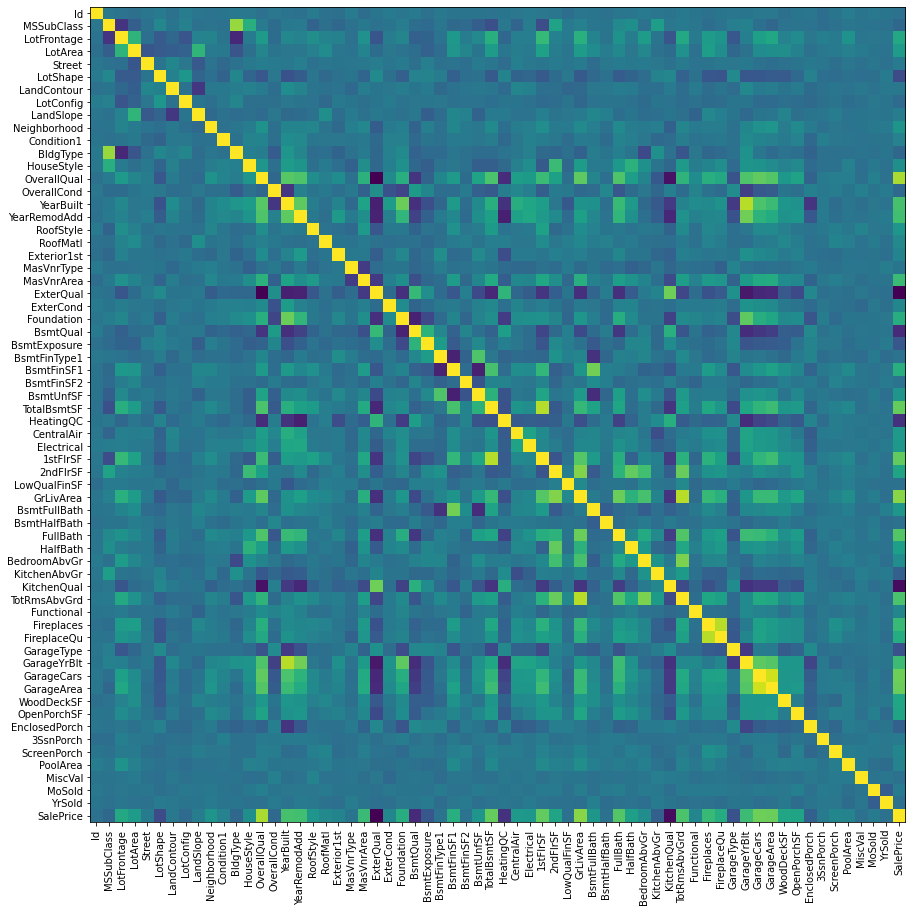

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks(np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
ax.set_yticks(np.arange(len(corr.columns)), labels=corr.columns)
ax.imshow(corr)
plt.show()

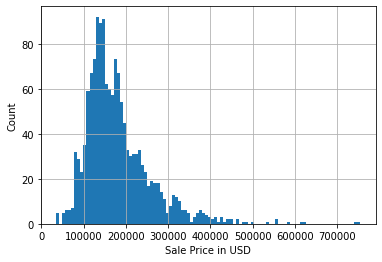

In [21]:
plt.xlabel('Sale Price in USD')
plt.ylabel('Count')
df.SalePrice.hist(bins=100);

In [95]:
cols_to_keep = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', #PositiveCorrelation
    'LotShape', 'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'GarageType', #Negative Correlation
    'SalePrice' #Target
]

## Categorical: OverallQual, LotShape, ExterQual, BsmtQual, HeatingQC, KitchenQual, GarageType
## Continuous: GrLivArea, GarageCars, YearBuilt, MasVnrArea, TotalBsmtSF

In [ ]:
df.Street = df.Street.astype('category').cat.codes
df.Neighborhood = df.Neighborhood.astype('category').cat.codes
df.LotShape = df.LotShape.astype('category').cat.codes
df.LandContour = df.LandContour.astype('category').cat.codes
df.LotConfig = df.LotConfig.astype('category').cat.codes
df.LandSlope = df.LandSlope.astype('category').cat.codes
df.Condition1 = df.Condition1.astype('category').cat.codes
df.BldgType = df.BldgType.astype('category').cat.codes
df.HouseStyle = df.HouseStyle.astype('category').cat.codes
df.RoofStyle = df.RoofStyle.astype('category').cat.codes
df.RoofMatl = df.RoofMatl.astype('category').cat.codes
df.Exterior1st = df.Exterior1st.astype('category').cat.codes
df.MasVnrType = df.MasVnrType.astype('category').cat.codes
df.ExterQual = df.ExterQual.astype('category').cat.codes
df.ExterCond = df.ExterCond.astype('category').cat.codes
df.Foundation = df.Foundation.astype('category').cat.codes
df.BsmtQual = df.BsmtQual.astype('category').cat.codes
df.BsmtExposure = df.BsmtExposure.astype('category').cat.codes
df.BsmtFinType1 = df.BsmtFinType1.astype('category').cat.codes
df.HeatingQC = df.HeatingQC.astype('category').cat.codes
df.CentralAir = df.CentralAir.astype('category').cat.codes
df.Electrical = df.Electrical.astype('category').cat.codes
df.KitchenQual = df.KitchenQual.astype('category').cat.codes
df.Functional = df.Functional.astype('category').cat.codes
df.GarageType = df.GarageType.astype('category').cat.codes
df.FireplaceQu = df.FireplaceQu.astype('category').cat.codes

#### Compare correlations from heatmap to individual scatter plots of feature x target

<Figure size 1440x1440 with 0 Axes>

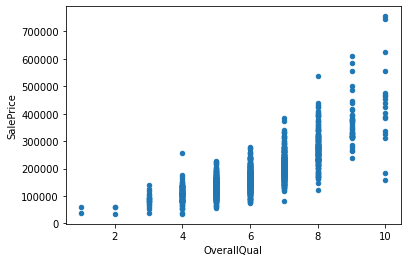

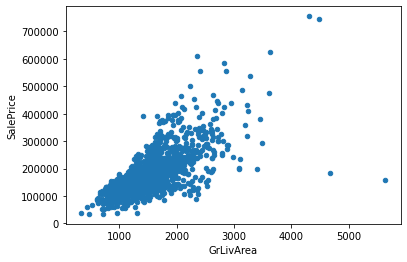

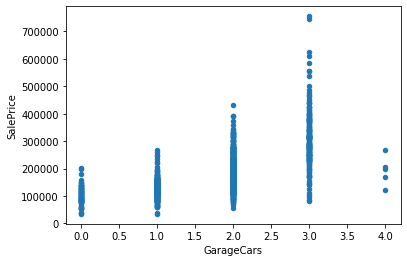

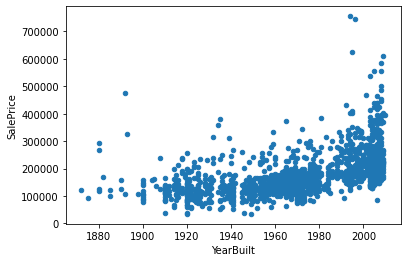

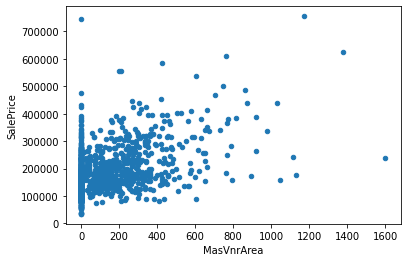

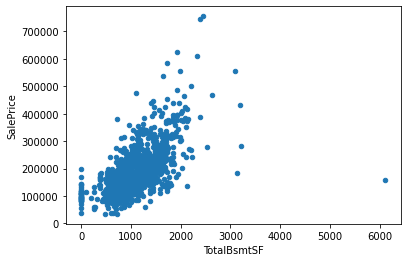

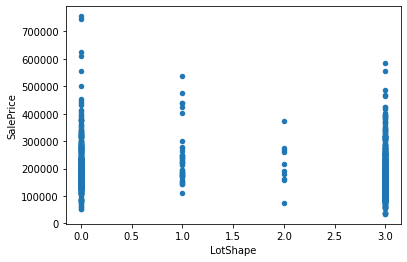

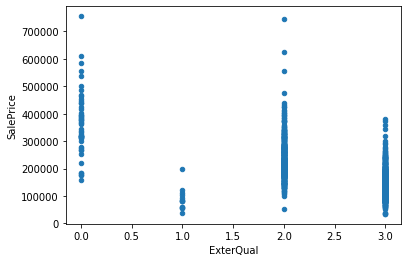

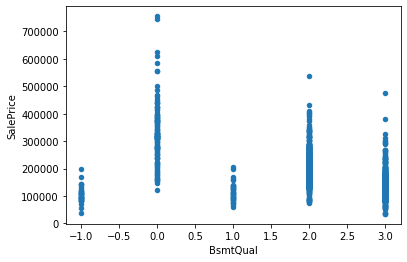

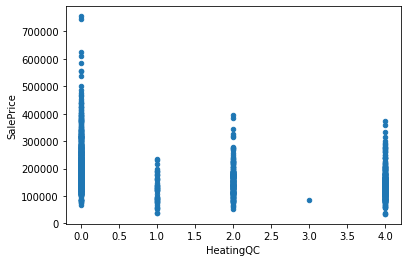

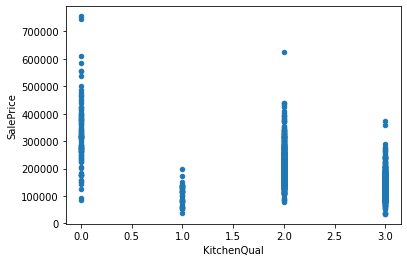

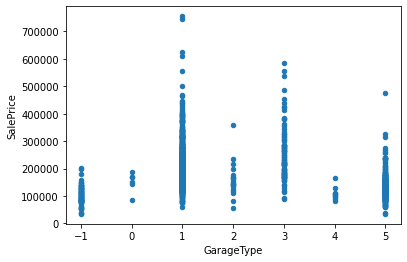

In [85]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(cols_to_keep):
    df[[col, 'SalePrice']].plot(kind='scatter', x=col, y='SalePrice');

In [23]:
df[df['SalePrice'] == 755000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


## Model Building

### Build model using columns shortlisted

In [191]:
df_train = df[cols_to_keep].copy()

In [192]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop("SalePrice", axis=1), df_train.SalePrice, random_state=seed)


In [195]:
regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [199]:
### R^2
regr.score(X_test, y_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8262576478248225

### Build model with full dataset to try to improve accuracy

In [182]:
tmp = df.select_dtypes(include='number')

In [201]:
df_train = pd.concat([df[['Street', 'Neighborhood', 
   'LotShape', 'LandContour', 
   'LotConfig', 'LandSlope', 
   'Condition1', 'BldgType', 
   'HouseStyle', 'RoofStyle',
   'RoofMatl', 'Exterior1st',
   'MasVnrType', 'ExterQual',
   'ExterCond', 'Foundation',
   'BsmtQual', 'BsmtExposure',
   'BsmtFinType1', 'HeatingQC',
   'CentralAir', 'Electrical',
   'KitchenQual', 'Functional',
   'GarageType', 'FireplaceQu',]], tmp], axis=1)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop("SalePrice", axis=1), df_train.SalePrice, random_state=seed)

In [210]:
regr = RandomForestRegressor(min_samples_leaf=10, min_impurity_decrease=0.7)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [211]:
regr.score(X_test, y_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8373575666990438

### Taking original shortlisted variables and OHE instead of categorical encoding

In [247]:
df_train = df[cols_to_keep].copy()
df_train_X = df_train.drop("SalePrice", axis=1)
df_train_Y = df_train['SalePrice']

In [248]:
categoricalcols = ["OverallQual", "LotShape", "ExterQual", "BsmtQual", "HeatingQC", "KitchenQual", "GarageType"]
numericalcols = [x for x in df_train_X.columns if x not in categoricalcols]

In [254]:
X_cat = pd.get_dummies(df_train_X[categoricalcols], columns=categoricalcols)
X = pd.concat([X_cat, df_train_X[numericalcols]], axis=1)

In [255]:
X.head()

,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,...,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GrLivArea,GarageCars,YearBuilt,MasVnrArea,TotalBsmtSF
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1710,2,2003,196.0,856
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1262,2,1976,0.0,1262
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1786,2,2001,162.0,920
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1717,3,1915,0.0,756
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,2198,3,2000,350.0,1145


In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train_Y, random_state=seed)

In [257]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [258]:
regressor.score(X_test, y_test)

/Users/aditinabar/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8240824287217365

Using one-hot encoded categorical variables did not perform any better than using the categorically encoded variables.